In [23]:
import pandas as pd
%matplotlib inline

In [24]:
surveys_df = pd.read_csv("surveys.csv")

In [25]:
surveys_df.columns

Index([u'record_id', u'month', u'day', u'year', u'plot_id', u'species_id',
       u'sex', u'hindfoot_length', u'weight'],
      dtype='object')

In [26]:
pd.unique(surveys_df['year'])

array([1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002])

In [27]:
len(pd.unique(surveys_df['year']))

26

In [28]:
surveys_df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

In [29]:
surveys_df['weight'].mean()

42.672428212991356

In [30]:
surveys_df['weight'].std()

36.63125947458358

In [31]:
grouped_surveys = surveys_df.groupby('sex')

In [32]:
grouped_surveys.mean()

,record_id,month,day,year,plot_id,hindfoot_length,weight
sex,,,,,,,
F,18036.412046,6.583047,16.007138,1990.644997,11.440854,28.836780,42.170555
M,17754.835601,6.392668,16.184286,1990.480401,11.098282,29.709578,42.995379


In [33]:
grouped_surveys2 = surveys_df.groupby(['plot_id','sex'])

In [34]:
grouped_surveys2.describe().head()

day                                                    \
              count       mean       std  min   25%   50%   75%   max   
plot_id sex                                                             
1       F     848.0  15.338443  8.325993  1.0   9.0  15.0  22.0  31.0   
        M    1095.0  15.905936  8.053257  1.0   9.0  16.0  23.0  31.0   
2       F     970.0  16.288660  8.046509  1.0  10.0  16.0  23.0  31.0   
        M    1144.0  15.440559  8.414667  1.0   9.0  15.0  23.0  31.0   
3       F     893.0  16.161254  7.961706  1.0   9.0  16.0  23.0  31.0   

            hindfoot_length              ...   weight           year  \
                      count       mean   ...      75%    max   count   
plot_id sex                              ...                           
1       F             808.0  31.733911   ...     50.0  196.0   848.0   
        M            1047.0  34.302770   ...     54.0  231.0  1095.0   
2       F             918.0  30.161220   ...     51.0  274.0   970.0   
        M            1077.0  30.353760   ...     50.0  278.0  1144.0   
3       F             863.0  23.774044   ...     34.0  199.0   893.0   

                                                                            
                    mean       std     min     25%     50%     75%     max  
plot_id sex                                                                 
1       F    1990.933962  7.678171  1977.0  1983.0  1991.0  1998.0  2002.0  
        M    1990.091324  7.265208  1977.0  1983.0  1990.0  1997.0  2002.0  
2       F    1990.449485  7.519910  1977.0  1984.0  1990.0  1997.0  2002.0  
        M    1990.756119  7.714444  1977.0  1983.0  1991.0  1998.0  2002.0  
3       F    1992.013438  6.811511  1977.0  1987.0  1992.0  1998.0  2002.0  

[5 rows x 48 columns]

In [35]:
surveys_df['weight']*2

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
         ...  
35519     72.0
35520     96.0
35521     90.0
35522     88.0
35523     54.0
35524     52.0
35525     48.0
35526     86.0
35527      NaN
35528     50.0
35529      NaN
35530      NaN
35531     86.0
35532     96.0
35533    112.0
35534    106.0
35535     84.0
35536     92.0
35537     62.0
35538    136.0
35539     46.0
35540     62.0
35541     58.0
35542     68.0
35543      NaN
35544      NaN
35545      NaN
35546     28.0
35547    102.0
35548      NaN
Name: weight, Length: 35549, dtype: float64

In [36]:
surveys_df.columns

Index([u'record_id', u'month', u'day', u'year', u'plot_id', u'species_id',
       u'sex', u'hindfoot_length', u'weight'],
      dtype='object')

In [37]:
surveys_df.head(2)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN


In [38]:
surveys_df.shape

(35549, 9)

In [39]:
%matplotlib inline

In [61]:
# Create Summary counts
# count the number of samples for each species

species_counts = surveys_df.groupby('species_id')['record_id'].count()

In [58]:
species_counts.head()

species_id
AB    303
AH    437
AS      2
BA     46
CB     50
Name: record_id, dtype: int64

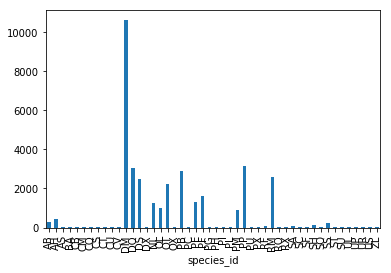

In [59]:
# making a plot of species counts
species_counts.plot(kind='bar');

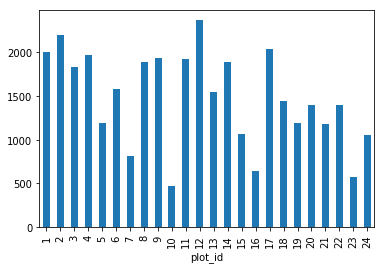

In [60]:
total_count = surveys_df.groupby('plot_id')['record_id'].nunique()
total_count.plot(kind='bar')

In [62]:
# Create a plot of the average weight across all species per plot.
species_weights = surveys_df.groupby('species_id')['weight'].mean()

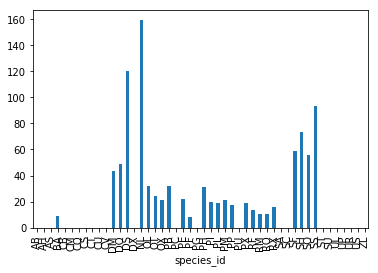

In [70]:
species_weights.plot(kind='bar');

In [86]:
d = {'one' : pd.Series([1,2,3], 
                       index = ['a','b','c']),
     'two' : pd.Series([1,2,3,4], 
                       index = ['a','b','c','d'])}

In [87]:
my_frame = pd.DataFrame(d)
print(my_frame)

   one  two
a  1.0    1
b  2.0    2
c  3.0    3
d  NaN    4


In [ ]:
# group data by plot and sex (Gender) 
# then calculate mean weight for each plot
# create a stacked bar plot

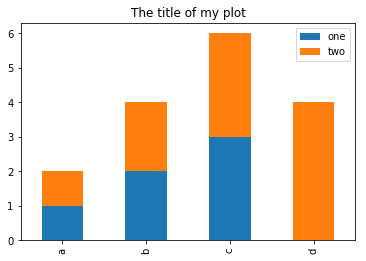

In [77]:
my_frame.plot(kind='bar',stacked=True,title='The title of my plot')

In [94]:
by_plot_sex = surveys_df.groupby(['plot_id','sex'])
by_plot_mean = by_plot_sex['weight'].mean()

In [104]:
unstacked = by_plot_mean.unstack()

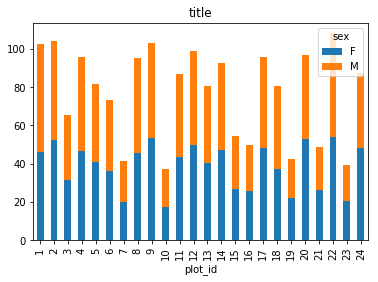

In [105]:
s_plot = unstacked.plot(kind='bar',stacked=True,title='title')

In [107]:
unstacked.to_csv("../summarized_plot_weights.csv")